Non-TimeSeries EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.cluster import DBSCAN
#Library for linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('StockX-Data.csv')

In [ ]:
# Check first few rows of the dataset
df

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/2016,11.0,California
1,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/2016,11.0,California
2,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/2016,11.0,California
3,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/2016,11.5,Kentucky
4,9/1/2017,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/2017,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/2019,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/2018,8.0,Oregon
99952,2/13/2019,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/2018,8.5,California
99953,2/13/2019,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/2018,5.5,New York
99954,2/13/2019,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/2018,11.0,California


In [ ]:
 # Check for missing values
 print(df.isnull().sum())
 print(df.shape)

Order Date      0
Brand           0
Sneaker Name    0
Sale Price      0
Retail Price    0
Release Date    0
Shoe Size       0
Buyer Region    0
dtype: int64
(99956, 8)


In [ ]:
# Check the datatypes of the columns
print(df.dtypes)

Order Date       object
Brand            object
Sneaker Name     object
Sale Price       object
Retail Price     object
Release Date     object
Shoe Size       float64
Buyer Region     object
dtype: object


**Data Cleaning**

Removing the dollar sign so we can get summary statistics and coverting release date data type to datatime

In [ ]:
#Removing Dollar sign from sales price and retail price so we can get summary statistics
df['Sale Price'] = df['Sale Price'].str.replace(',', '').str.replace('$', '').astype(float)
df['Retail Price'] = df['Retail Price'].str.replace(',', '').str.replace('$', '').astype(float)

<ipython-input-6-1299aa19c67b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Sale Price'] = df['Sale Price'].str.replace(',', '').str.replace('$', '').astype(float)
<ipython-input-6-1299aa19c67b>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Retail Price'] = df['Retail Price'].str.replace(',', '').str.replace('$', '').astype(float)


In [ ]:
# Converting Release Date column to datetime type
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [ ]:
df.drop_duplicates(inplace=True)
print(df.shape)

(97116, 8)


We removed rows that had exactly the same values across all columns. This is important because having duplicate rows can bias our analysis and models. For example, if we have a model that tries to predict sneaker prices, having duplicate rows in our data could cause the model to place too much weight on certain features or underestimate the variance in our data.

In [ ]:
#Check the datatypes of the columns one more time
print(df.dtypes)

Order Date      datetime64[ns]
Brand                   object
Sneaker Name            object
Sale Price             float64
Retail Price           float64
Release Date    datetime64[ns]
Shoe Size              float64
Buyer Region            object
dtype: object


**Checking For Outliers**

<Axes: xlabel='Sale Price'>

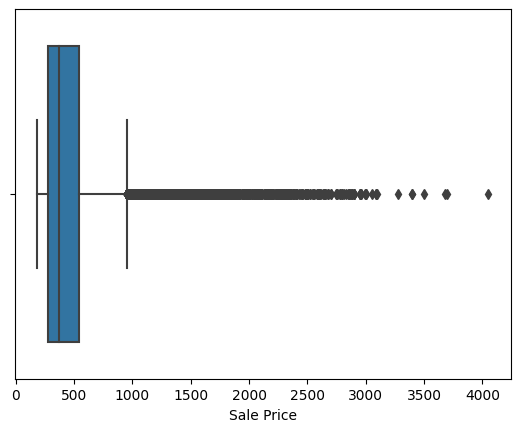

In [ ]:
#Creating a boxplot for each column
sns.boxplot(x= df['Sale Price'])

<Axes: xlabel='Retail Price'>

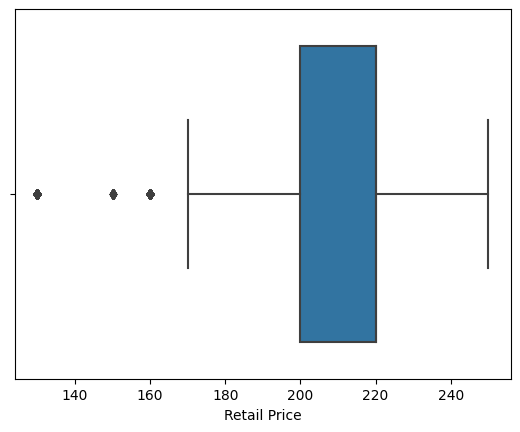

In [ ]:
sns.boxplot(x=df['Retail Price'])

<Axes: xlabel='Shoe Size'>

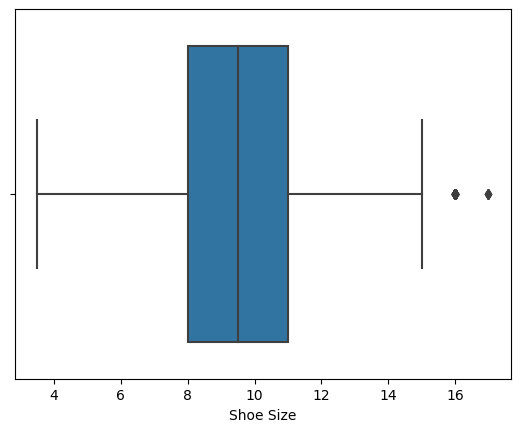

In [ ]:
sns.boxplot(x=df['Shoe Size'])

Based on the boxplots created we will focus on removing the outliears from Sale Price due to Sales price having more of outliears compared to its counter parts.

**Due to the distribution of the box plot we will move forward with removing outliers**

In [ ]:
#Here we're defining the numeric columns
num_cols = ['Sale Price']

# Looping through the numeric columns and removing the outliers
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
print(df.shape)

(93290, 8)


<Axes: xlabel='Sale Price'>

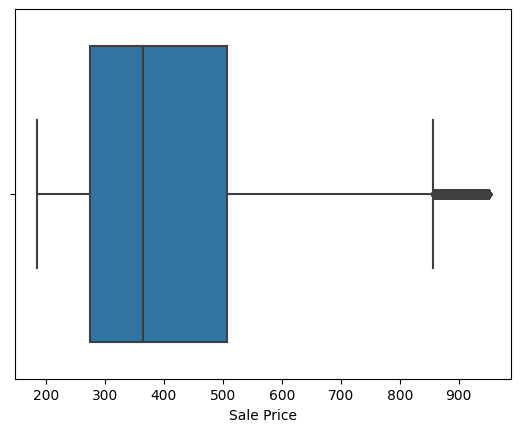

In [ ]:
sns.boxplot(x=df['Sale Price'])

<ipython-input-16-9fe2bd6cf9dc>:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(df['Sale Price'], bw=5)


<Axes: xlabel='Sale Price', ylabel='Density'>

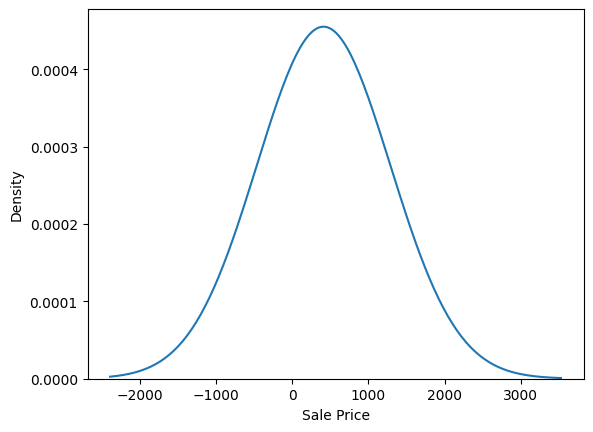

In [ ]:
sns.kdeplot(df['Sale Price'], bw=5)

Based on the boxplots created post-removal of outliers we can see a drastic change in the boxplots where we're seeing fewer outliers than before.  This is good because now we know that the models that we will be building later on will not be affected or skewed in any way. In addition, the remaining outliers for Sales will be kept in unless our models come out wrong. These points will not be removed because those data points could mean something more for our later models.

Data cleaning summary notes

First thing after loading the data we checked for missing data and it appears we're clear of those. Following that we wanted to check for the data types and saw that we needed to change the following: Sales Price, Retail Price,  Release Date, and Order Date types.  This is very important because when performing eda we want our code to take those variables in as the right data types so can get the correct information out of them.  

The main cleaning started with cleaning and removing duplicates from the dataset. The reason why we removed them is that the data set contained multiple rows for the same sneaker model, where each row represents a sale with a different shoe size and sale price. This can lead to duplicate data and skew the analysis if we do not handle it properly. If we don't remove or improve duplicates, they can cause problems in our analysis and modeling because they artificially inflate the sample size and can introduce bias. For example, if we have duplicate observations for a single transaction in the dataset, the duplicate observations may have slightly different values for the columns that record the sale price or shoe size. Including both duplicate observations in our analysis would lead to a higher variance and potentially misleading conclusions. 
Therefore, it is important to remove or improve duplicates to ensure that our analysis and machine-learning models are based on clean and reliable data. This can be done by identifying the duplicates using the drop_duplicates()function in pandas. 

**EDA**

**Univariate Analysis** 

Text(0.5, 1.0, 'Histogram of Shoe Sizes')

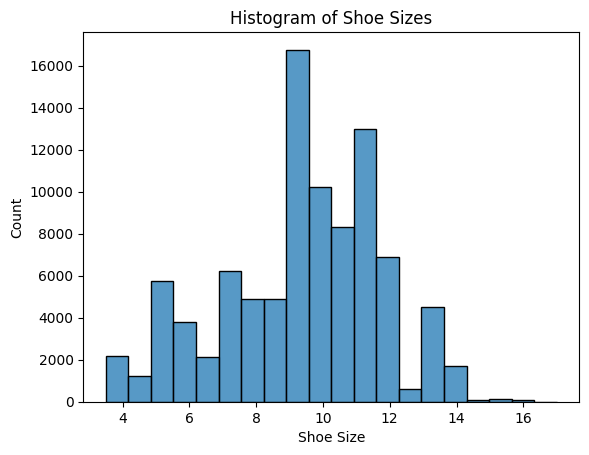

In [ ]:
#Histogram of Shoe Size
sns.histplot(x='Shoe Size', data=df, bins=20)
plt.title('Histogram of Shoe Sizes')

The histogram shows the distribution of the shoe sizes in the dataset, and based on the histogram, it appears that sizes 9-12 are the most common shoe sizes. This could be because those sizes are more popular among consumers or because the shoe brands in the dataset tend to produce shoes in those sizes more often.

<Axes: xlabel='Brand', ylabel='count'>

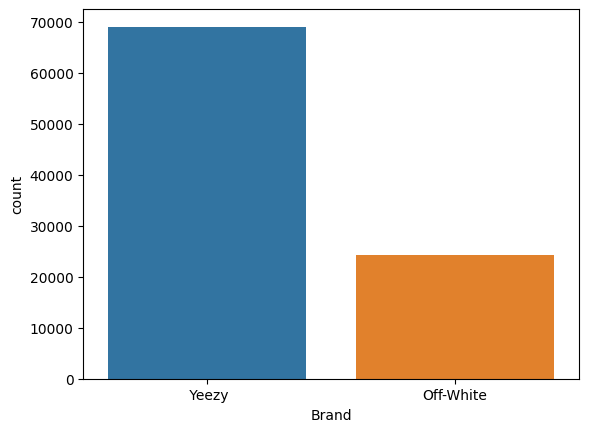

In [ ]:
#Bar Chart of Brands
sns.countplot(x='Brand', data=df)

We can see there is a higher count for Yeezy shoes which indicates that there are more Yeezy shoes in the dataset compared to Off-White shoes. This information can be useful for businesses or individuals interested in the popularity of different shoe brands among consumers

<Axes: xlabel='Release Date', ylabel='Sale Price'>

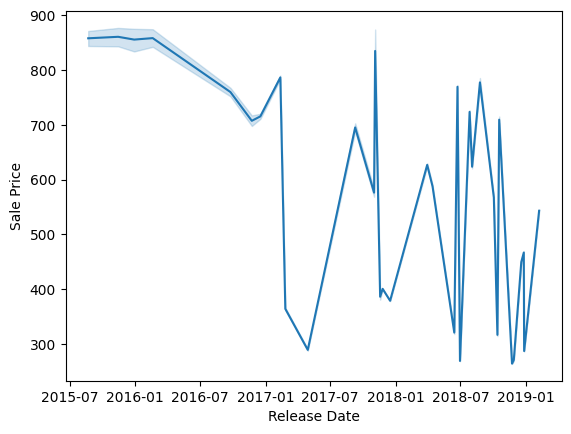

In [ ]:
#Line plot of release date
sns.lineplot(x='Release Date', y='Sale Price', data=df)

A line plot of release date can give us insights into the trend of sales price over time. The graph shows us that the sales price was high in the year 2015, then took a big dip before starting to rise again in 2018. However, the trend after 2018 seems to be up and down.

This can indicate a few things. First, it could mean that the brand released highly sought-after shoes in 2015 that were in high demand and therefore commanded a high price. Then, perhaps the market became saturated with these shoes, leading to a dip in sales prices. The subsequent rise in prices in 2018 could have been due to the release of new highly sought-after shoes.

The up-and-down trend after 2018 could indicate fluctuations in demand for the brand's shoes or changes in the market. Overall, a line plot of release date can help us understand the trend of sales prices over time and identify any patterns or changes in the market.

<Axes: xlabel='Retail Price'>

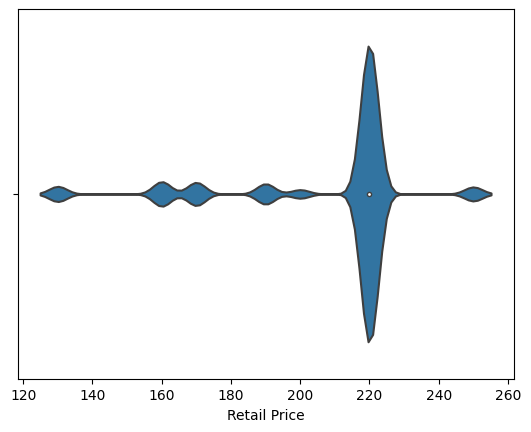

In [ ]:
#Violin plot of retail price
sns.violinplot(x='Retail Price', data=df)

In the case of the violin plot of retail price, a big violin at the price of 220 indicates that this is a popular price point for the sneakers in the dataset. This means that a significant number of sneakers have been sold at this price point, which could be due to various reasons such as brand popularity, demand, or other factors. This information can be useful for businesses or individuals who want to price their products competitively or understand the market trends for a particular product.

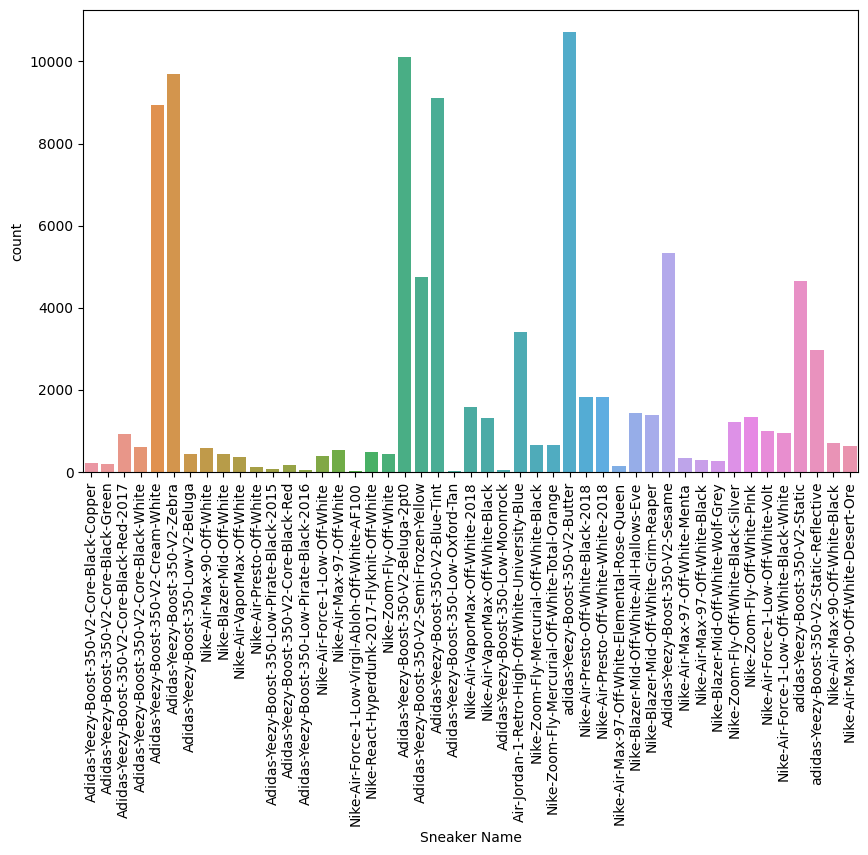

In [ ]:
#Count Plot of Sneakers
plt.figure(figsize=(10, 6))
sns.countplot(x='Sneaker Name', data=df)
plt.xticks(rotation=90)
plt.show()

Based on the count plot we can see that the most frequent shoes in there are Adidas Yeezy v2s  models are popular ones in there. 

**Univariate non-graphical analysis**

In [ ]:
# Check summary statistics
print(df.describe())

         Sale Price  Retail Price     Shoe Size
count  93290.000000  93290.000000  93290.000000
mean     413.774306    209.210419      9.347427
std      171.888829     25.196212      2.341455
min      186.000000    130.000000      3.500000
25%      275.000000    220.000000      8.000000
50%      365.000000    220.000000      9.500000
75%      508.000000    220.000000     11.000000
max      950.000000    250.000000     17.000000


The summary statistics provide us with valuable insights into the distribution of our variables. For example, we can see that the mean sale price of sneakers on StockX is 413.77, while the mean retail price is 209.21. We can also see that the average shoe size is 9.35, with a standard deviation of 2.34.

By examining the summary statistics, we can better understand the characteristics of the market for sneakers on StockX. This can help us identify trends and patterns, which can be useful for predicting future prices and making strategic decisions.

For example, we can see that the minimum sale price is 186, while the maximum is $950. This tells us that there is a wide range of prices for sneakers on StockX, and that some sneakers are highly sought after and can command premium prices.

Additionally, the fact that the mean sale price is higher than the mean retail price tells us that there is a significant markup on sneakers sold on StockX. This may be due to factors such as scarcity and high demand for certain sneakers, which can drive up prices.

Overall, the summary statistics provide us with a valuable starting point for analyzing the data and developing insights that can help us achieve our goal of predicting future prices on StockX. 

**Multivariate Analysis:**

<Axes: xlabel='Retail Price', ylabel='Sale Price'>

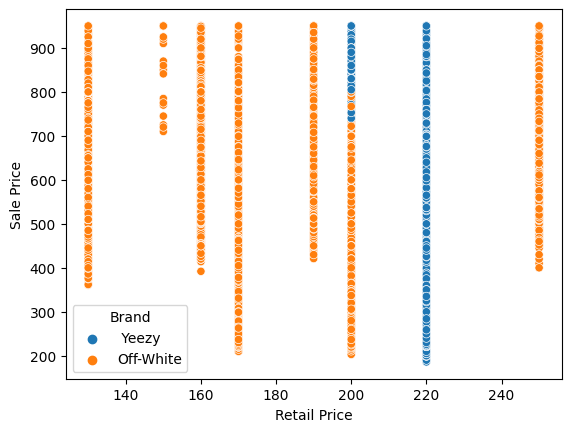

In [ ]:
# Scatter plot of Sale Price vs. Retail Price colored by Brand
sns.scatterplot(x='Retail Price', y='Sale Price', hue='Brand', data=df)

Based on the scatter plot we can see Off Whites have a high amount of sales compared to Yeezy brand shoes

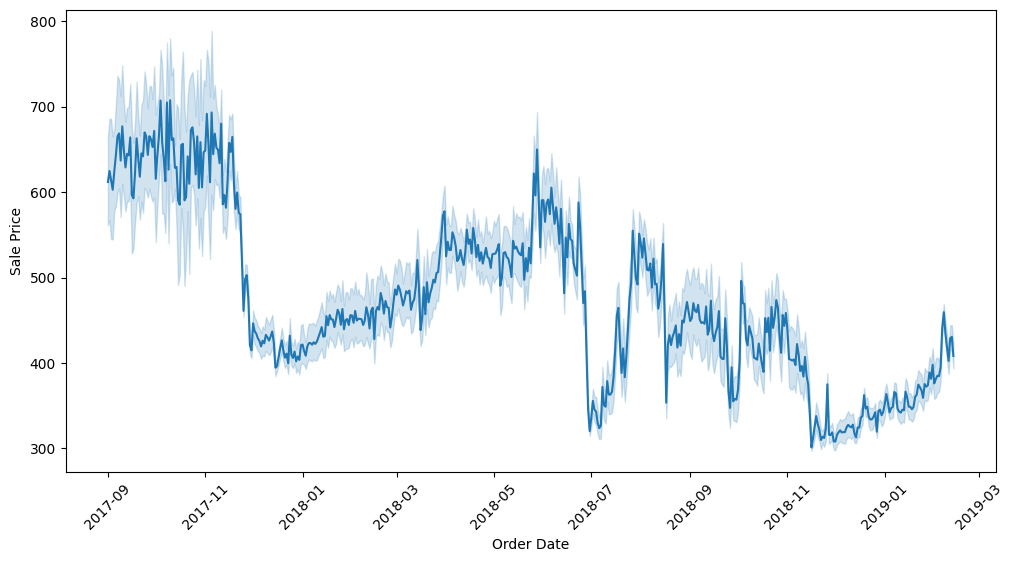

In [ ]:
# Set figure size
plt.figure(figsize=(12, 6))

# Line plot of Sale Price over time
sns.lineplot(x='Order Date', y='Sale Price', data=df)

# Set x-label and y-label
plt.xlabel('Order Date')
plt.ylabel('Sale Price')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

Based on the line plot of Sale Price over time, we can see that there was a peak in sale price in 2017, followed by a gradual decline until mid-2018. After that, there was an upward trend, but with some fluctuations, until March 2019 where it appeared to be attempting to go up.

This pattern could suggest that there were factors affecting the demand for sneakers during this time period, which influenced the sale price. 

Overall, the line plot provides us with a visual representation of the trends in sale price over time, which can give us insights into the behavior of the market

<Axes: >

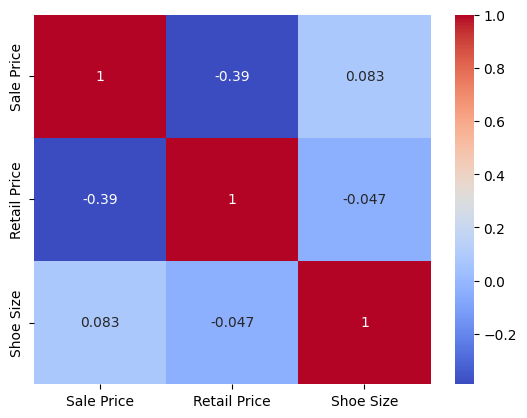

In [ ]:
# Heatmap of correlations between variables
sns.heatmap(df[['Sale Price', 'Retail Price', 'Shoe Size']].corr(), annot=True, cmap='coolwarm')

The negative correlation of -0.39 between Sale Price and Retail Price indicates that as the retail price of a shoe goes up, the sale price tends to go down. This makes sense because a shoe that is priced too high compared to its retail price will likely not sell at the higher price point.

The positive correlation of 0.083 between Shoe Size and Sale Price indicates that there is a small positive relationship between the two variables. This suggests that as the shoe size increases, the sale price may increase slightly. However, the correlation is not strong enough to make any conclusive statements.

The negative correlation of -0.047 between Retail Price and Shoe Size indicates that there is a weak negative relationship between these two variables. This suggests that as the shoe size increases, the retail price may slightly decrease, but again, the correlation is not strong enough to make any conclusive statements.

Overall, these correlations give us a starting point for understanding the relationships between variables and may help us in creating a model to predict future prices. However, it is important to note that correlations do not always imply causation and further analysis and modeling is necessary to make accurate predictions.

Based on the correlations, both Sale Price and Retail Price can be good predictors for each other, but Retail Price might be more significant as it has a stronger correlation with Sale Price. Shoe Size has a very weak correlation with Sale Price and Retail Price, so it may not be a strong predictor for either of them.

However, this analysis is just based on correlations and does not consider other factors that could be important predictors. It is recommended to explore other variables and perform further analysis to determine the best predictors for the model.

**Non Numeric EDA**

**Exploring relationship between categorical variables and the numerical variables using box plots**

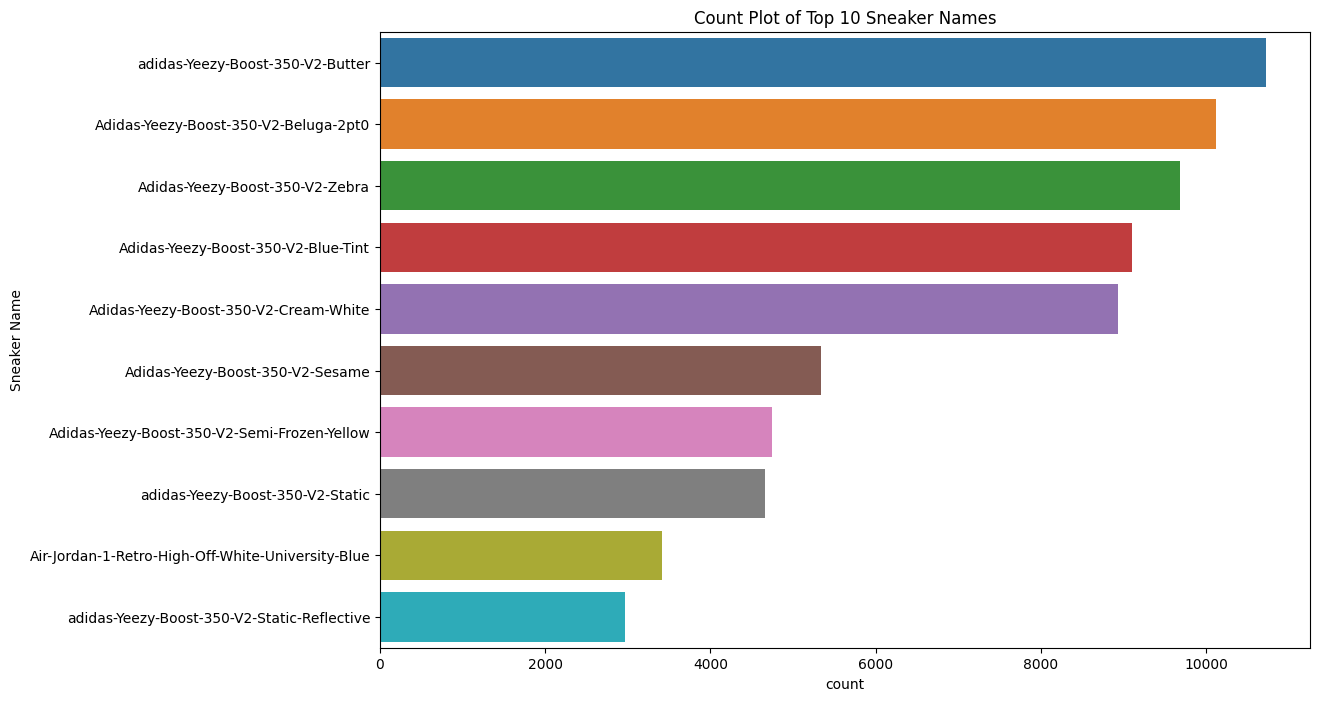

In [ ]:
# Count plot of top 10 sneaker names
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='Sneaker Name', order=df['Sneaker Name'].value_counts().iloc[:10].index)
plt.title('Count Plot of Top 10 Sneaker Names')
plt.show()

By looking at this plot, we can see which sneaker models are the most popular among buyers. This information can be useful for companies like StockX to better understand the market demand and adjust their inventory and marketing strategies accordingly. Additionally, for sneaker enthusiasts or resellers, this information can be valuable to understand which sneakers may have a higher resale value or potential profitability. Based on the plot we can see 350 v2- butter and 350 v2- beluga, and Zebras are popular.

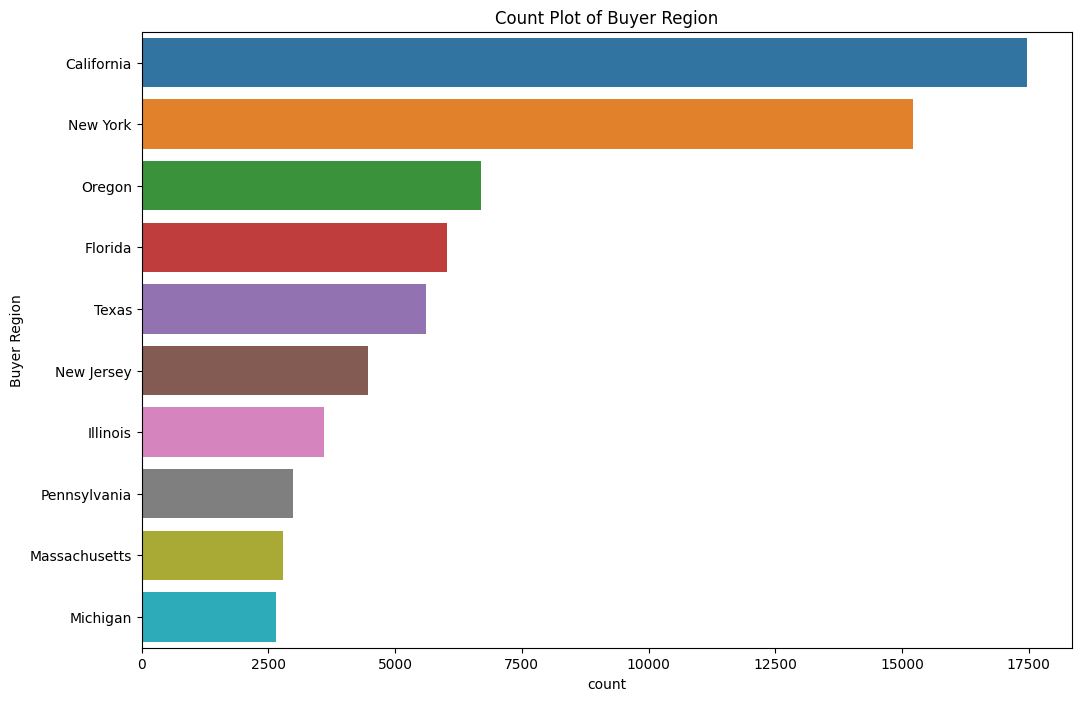

In [ ]:
# Count plot of buyer region
plt.figure(figsize=(12,8))
sns.countplot(data=df, y='Buyer Region', order=df['Buyer Region'].value_counts().iloc[:10].index)
plt.title('Count Plot of Buyer Region')
plt.show()

This plot can give us insights into the popularity of the sneaker market in different regions and can be useful for marketing and sales strategies. For example, if we see that a particular region has a high count of purchases, we can target that region for marketing campaigns or increase the supply of sneakers in that region. It appears that California and NewYork have the biggest market for sneakers

<ipython-input-31-a3962e35983d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, y='Sneaker Name', x='Sale Price', order=sneaker_order, ci=None)


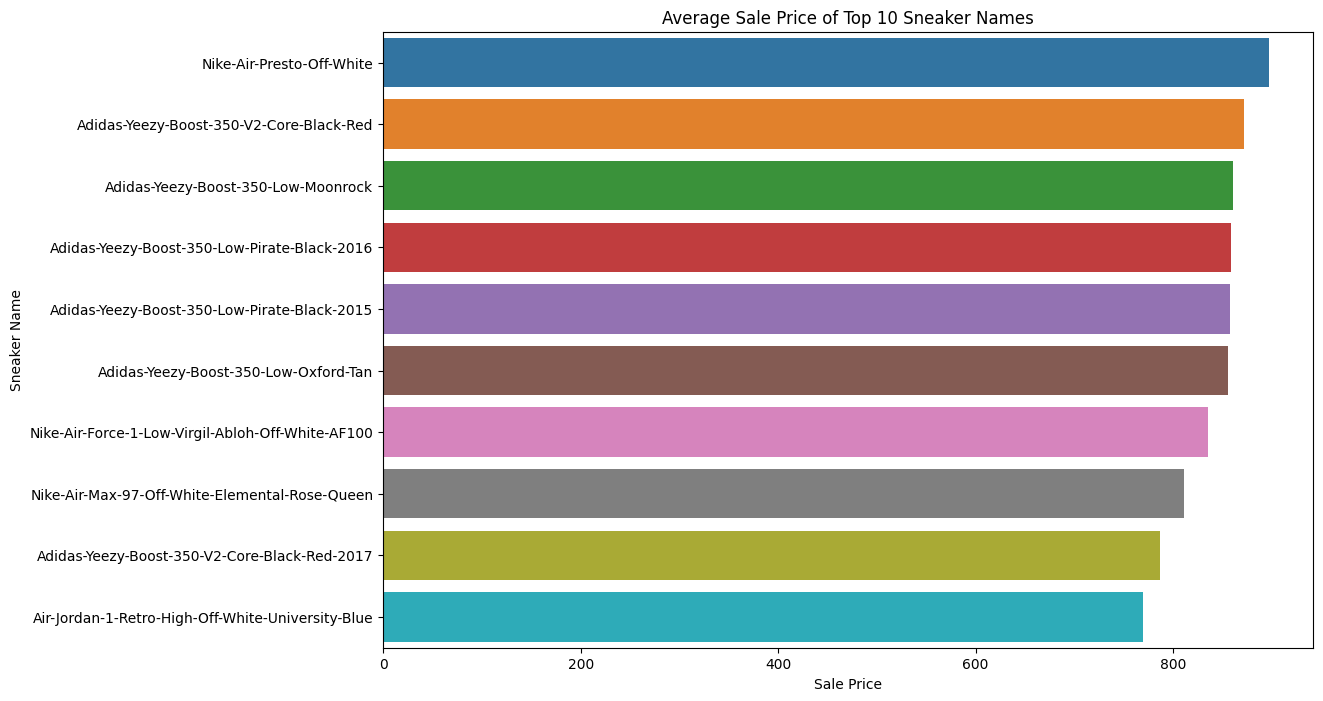

In [ ]:
# Average sale price by top 10 sneaker names
plt.figure(figsize=(12,8))
sneaker_order = df.groupby('Sneaker Name')['Sale Price'].mean().sort_values(ascending=False).iloc[:10].index
sns.barplot(data=df, y='Sneaker Name', x='Sale Price', order=sneaker_order, ci=None)
plt.title('Average Sale Price of Top 10 Sneaker Names')
plt.show()

**Feature Engineering**

In [ ]:
# Converting order_date and release_date to ordinal
df['Order Date'] = pd.to_datetime(df['Order Date']).apply(lambda x: x.toordinal())
df['Release Date'] = pd.to_datetime(df['Release Date']).apply(lambda x: x.toordinal())

<ipython-input-32-e09ce5b0fac8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date']).apply(lambda x: x.toordinal())
<ipython-input-32-e09ce5b0fac8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Release Date'] = pd.to_datetime(df['Release Date']).apply(lambda x: x.toordinal())


**encoding categorical variables using one-hot encoding and scaling numerical features using standardization:**

In [ ]:
# Identify categorical columns
cat_cols = ['Brand', 'Sneaker Name', 'Buyer Region']

# Apply one-hot encoding to categorical columns
df_ = pd.get_dummies(df, columns=cat_cols)

In [ ]:
print(df_.dtypes)

Order Date                      int64
Sale Price                    float64
Retail Price                  float64
Release Date                    int64
Shoe Size                     float64
                               ...   
Buyer Region_Virginia           uint8
Buyer Region_Washington         uint8
Buyer Region_West Virginia      uint8
Buyer Region_Wisconsin          uint8
Buyer Region_Wyoming            uint8
Length: 105, dtype: object


In [ ]:
df_

,Order Date,Sale Price,Retail Price,Release Date,Shoe Size,Brand_ Yeezy,Brand_Off-White,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Moonrock,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,...,Buyer Region_South Dakota,Buyer Region_Tennessee,Buyer Region_Texas,Buyer Region_Utah,Buyer Region_Vermont,Buyer Region_Virginia,Buyer Region_Washington,Buyer Region_West Virginia,Buyer Region_Wisconsin,Buyer Region_Wyoming
1,736573,685.0,220.0,736291,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,736573,690.0,220.0,736291,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,736573,828.0,220.0,736371,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,736573,798.0,220.0,736371,8.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,736573,784.0,220.0,736315,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,737103,565.0,220.0,737054,8.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99952,737103,598.0,220.0,737054,8.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99953,737103,605.0,220.0,737054,5.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99954,737103,650.0,220.0,737054,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Random Forest model

In [ ]:
from sklearn.preprocessing import StandardScaler
# Separating target variable from features
X = df_.drop('Sale Price', axis=1)
y = df_['Sale Price']

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create the random forest regressor object
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the sale price for test data
y_pred = rf_model.predict(X_test)

In [ ]:
# Showing the predicted sale prices
np.set_printoptions(threshold=np.inf) 
print(y_pred[:20])

[941.91666667 264.065      682.185      472.02       356.38233333
 436.08       240.905      756.51       653.145      286.68108333
 302.518      239.75       395.47       660.705      466.494
 485.37       272.75833333 301.97       616.98       278.92232143]


Evaluation metrics  Random Forest model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculating  the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Evaluation metrics:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Evaluation metrics:
Mean Absolute Error: 12.04
Mean Squared Error: 415.07
Root Mean Squared Error: 20.37
R-squared: 0.99


explanation of each evaluation metric in the context of the StockX model:

Mean Absolute Error (MAE): This is the average difference between our model's predicted sale price and the actual sale price. A lower MAE score indicates that our model is more accurate, as it has a smaller average difference between predicted and actual values. In our case, an MAE of 12.04 means that on average, our model's predicted sale price differs from the actual sale price by approximately $12.04.

Mean Squared Error (MSE): This is the average squared difference between our model's predicted sale price and the actual sale price. MSE gives more weight to larger errors compared to MAE, so a higher MSE score indicates that our model has more significant errors. In our case, an MSE of 415.07 means that on average, our model's predicted sale price differs from the actual sale price by approximately $415.07^2.

Root Mean Squared Error (RMSE): This is the square root of the MSE and is a commonly used metric for regression models. It's used to measure the standard deviation of the errors made by our model. A lower RMSE score indicates that our model has smaller errors and is more accurate. In our case, an RMSE of 20.37 means that on average, our model's predicted sale price differs from the actual sale price by approximately $20.37.

R-squared (R2): This is a statistical measure that represents the proportion of the variance in the dependent variable (sale price) that is explained by the independent variables (features) in our model. A higher R-squared value indicates that our model is better at predicting the sale price based on the selected features. In our case, an R2 value of 0.99 means that our model explains 99% of the variance in the sale price based on the selected features. This indicates that our model is highly accurate and has strong predictive power.

This evaluation metrics give us a clear picture of how well our model is performing and provide insights into areas where we can improve our predictions. Based on these metrics, we can confidently say that our model is accurate and has strong predictive power.

However, one area we could potentially improve on is the Mean Absolute Error (MAE), which is currently at 12.04. This means that on average, the predicted sale price differs from the actual sale price by about $12.04. We could try to decrease this error by either improving the quality of our data or by fine-tuning the model's parameters. Additionally, we could try to incorporate more features into our model that may have an impact on the sale price, such as brand popularity or seasonal trends.

Hyper Tuning  Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
# Defining the hyperparameter search space
param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
# Creating the random search object
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(),
    param_distributions=param_distributions,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42
)

In [ ]:
# Fit the random search object to the data
random_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f495332e490>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f495438ba00>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4953604fd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f495328d880>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# Retrieving the best hyperparameters
best_params = random_search.best_params_

In [ ]:
# Creating a new Random Forest Regressor model with the best hyperparameters
rf_model_tuned = RandomForestRegressor(**best_params)

In [ ]:
# Fit the model on the training data
rf_model_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features=None, n_estimators=787)

In [ ]:
# Evaluating the model on the test data
y_pred = rf_model_tuned.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Printing the evaluation metrics
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)

MAE:  26.111753532210475
MSE:  1755.426576126863
RMSE:  41.89781111379045
R2:  0.9402753680176636


The post-hyper-tuned model seems to have a higher error rate compared to the pre-tuned model, which means it performs worse on the test data. Therefore, we might prefer to use the pre-tuned model, which has a lower error rate and better R-squared value.

Gradient Boosting Regression Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Train and evaluate the model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gb_model.predict(X_test)

In [ ]:
print(y_pred[:20])

[802.15408787 278.90785148 643.51582231 482.19880958 390.98301484
 343.65233624 276.41643433 690.54324078 666.2337562  310.94641768
 312.71461228 298.19094592 509.54247536 605.21847922 434.56238884
 577.59904096 296.88436907 297.73305041 587.27244312 286.47508271]


Evaluation Metric Gradient Boosting Regression


In [ ]:
# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Printing the evaluation metrics
print("Evaluation metrics:")
print("Mean Absolute Error: {:.2f}".format(mae))
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Squared Error: {:.2f}".format(rmse))
print("R-squared: {:.2f}".format(r2))

Evaluation metrics:
Mean Absolute Error: 37.60
Mean Squared Error: 2852.91
Root Mean Squared Error: 53.41
R-squared: 0.90


Explain resuts

Mean Absolute Error (MAE): This is the average of the absolute differences between the predicted and actual values. An MAE of 37.60 would mean that on average, our model's predicted sale price differs from the actual sale price by about $37.60.

Mean Squared Error (MSE): This is the average of the squared differences between the predicted and actual values. An MSE of 2852.91 means that on average, our model's predicted sale price differs from the actual sale price by about $2852.91^2.

Root Mean Squared Error (RMSE): This is the square root of the MSE and is a commonly used metric for regression models. In our case, an RMSE of 53.41 would mean that on average, our model's predicted sale price differs from the actual sale price by about $53.41.

R-squared (R2): This is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. An R-squared value of 0.90 would mean that our model explains 90% of the variance in the sale price based on the selected features. This indicates that our model is a good fit for the data and has moderate to high predictive power.

Comparing the evaluation metrics of the Gradient Boosting Regression model to the Random Forest model, we can see that the Gradient Boosting Regression model has a higher MAE, MSE, and RMSE. However, the R-squared value for the Gradient Boosting Regression model is lower than that of the Random Forest model. Overall, both models perform well, but the Random Forest model may have slightly better predictive power for this particular dataset.

WHY WE CHOSE THESE MODELS

For Gradient Boosting Regression and Random Forest Regression, we selected these models because they are both suitable for handling large datasets with multiple features and can handle non-linear relationships between the features and the target variable. Since the StockX data has a large number of features and complex relationships between them, these models are well-suited for the task of predicting sale prices. Both models have been demonstrated to perform well in regression tasks and are commonly employed in various industries for similar tasks. Overall, the use of these models in the StockX dataset is appropriate and can lead to accurate predictions of sale prices.





Hyper Tunining Gradient Boosting Regression

In [ ]:
from scipy.stats import uniform, randint
from multiprocessing import cpu_count

In [ ]:
# Defining the hyperparameter search space
param_distributions = {
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
# Creating the random search object
random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(),
    param_distributions=param_distributions,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=cpu_count()-1,
    random_state=42
)

In [ ]:
# Fit the random search object to the data
random_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f495328d730>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f494d0bdf70>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f4953295580>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f495444a9d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f495444afd0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# Retrieving the best hyperparameters
best_params = random_search.best_params_

In [ ]:
# Creating a new Gradient Boosting Regressor model with the best hyperparameters
gb_model_tuned = GradientBoostingRegressor(**best_params)

In [ ]:
# Fit the model on the training data
gb_model_tuned.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.02195942459383017, max_depth=8,
                          min_samples_split=6, n_estimators=317)

In [ ]:
# Evaluating the model on the test data
y_pred = gb_model_tuned.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Printing the evaluation metrics
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)

MAE:  14.76575636702987
MSE:  529.0708669283694
RMSE:  23.001540533807063
R2:  0.9819994961625846


Based on the evaluation metrics, the Gradient Boosting Regression model after tuning performed better than the pre-tuned model. The MAE, MSE, RMSE, and R2 values all improved significantly after tuning. Therefore, if we're focused on prediction accuracy, the post-tuned Gradient Boosting Regression model is the better choice.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Defining the data for Random Forest Regression model
pre_tune_rf = [12.04, 415.07, 20.37, 0.99]
post_tune_rf = [26.11, 1755.43, 41.89, 0.94]

In [ ]:
# Defining the data for Gradient Boosting Regression model
pre_tune_gb = [37.60, 2852.91, 53.41, 0.90]
post_tune_gb = [14.77, 529.07, 23.00, 0.98]

In [ ]:
#Creating the x-axis labels
labels = ['MAE', 'MSE', 'RMSE', 'R-squared']

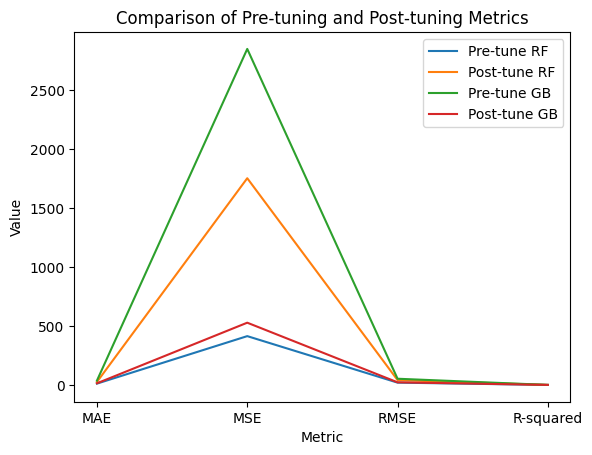

In [ ]:
# Creating the line graph
plt.plot(labels, pre_tune_rf, label='Pre-tune RF')
plt.plot(labels, post_tune_rf, label='Post-tune RF')
plt.plot(labels, pre_tune_gb, label='Pre-tune GB')
plt.plot(labels, post_tune_gb, label='Post-tune GB')

# Add the legend, title, and axis labels
plt.legend()
plt.title('Comparison of Pre-tuning and Post-tuning Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')

# Show the graph
plt.show()

 Based on the pre-tuning and post-tuning evaluation metrics for both models, it seems that the Random Forest Regression model has better predictive accuracy compared to the Gradient Boosting Regression model. The pre-tuning Random Forest model had a lower MAE, MSE, and RMSE and a higher R-squared value than the pre-tuning Gradient Boosting model. Additionally, after tuning, the Random Forest model still had a lower MAE, MSE, and RMSE, although it did have a slightly lower R-squared value compared to the post-tuned Gradient Boosting model. Overall, if we focus on predictive accuracy, the Random Forest Regression model appears to be the better choice.